# Описание проекта
Заказчик этого исследования — большая телекоммуникационная компания, которая оказывает услуги на территории всего СНГ. Перед компанией стоит задача определить текущий уровень потребительской лояльности, или NPS, среди клиентов из России. 
Чтобы определить уровень лояльности, клиентам задавали классический вопрос: «Оцените по шкале от 1 до 10 вероятность того, что вы порекомендуете компанию друзьям и знакомым».

Компания провела опрос, и теперь **необходимо создать дашборд с его итогами**. Большую базу данных для такой задачи разворачивать не стали и выгрузили данные в SQLite. 

Чтобы оценить результаты опроса, оценки обычно делят на три группы:
9-10 баллов — «cторонники» (англ. promoters);
7-8 баллов — «нейтралы» (англ. passives);
0-6 баллов — «критики» (англ. detractors).
Итоговое значение NPS рассчитывается по формуле: % «сторонников» - % «критиков».
Таким образом, значение этого показателя варьируется от -100% (когда все клиенты «критики») до 100% (когда все клиенты лояльны к сервису). 


С помощью дашборда необходимо ответить на следующие вопросы:

- Как распределены участники опроса по возрасту и полу? 
- Каких пользователей больше: новых или старых? Пользователи из каких городов активнее участвовали в опросе?
- Какие группы пользователей наиболее лояльны к сервису? Какие менее?
- Какой общий NPS среди всех опрошенных?
- Как можно описать клиентов, которые относятся к группе cторонников (англ. promoters)?

## SQL-запрос

In [4]:
import os
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

In [5]:
path_to_db_local = 'telecomm_csi.db'
path_to_db_platform = '/datasets/telecomm_csi.db'
path_to_db = None

if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
else:
    raise Exception('Файл с базой данных SQLite не найден!')

if path_to_db:
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)

In [6]:
query = """

WITH 
    age AS (SELECT age_gr_id, title FROM age_segment),
    
    traffic AS (SELECT tr_gr_id, title FROM traffic_segment),
    
    lifetime AS (SELECT lt_gr_id, title FROM lifetime_segment)


SELECT user.user_id, user.lt_day, 
    CASE 
        WHEN user.lt_day <= 365 THEN 'new'
        ELSE 'old'
    END AS is_new ,
user.age, 
    CASE 
        WHEN user.gender_segment = 1 THEN 'woman'
        WHEN user.gender_segment = 0 THEN 'man'
        Else 'Others'
    END AS gender
, user.os_name, user.cpe_type_name, location.country, location.city, age.title AS age_segmen, traffic.title AS traffic, lifetime.title AS lifetime_segment, user.nps_score,
    CASE 
        WHEN user.nps_score >= 9 THEN 'promoters'
        WHEN user.nps_score >= 7 AND user.nps_score < 9 THEN 'neutrals'
        WHEN user.nps_score >= 0 AND user.nps_score < 7 THEN 'detractors' 
    END AS nps_segment

FROM user JOIN location ON user.location_id = location.location_id JOIN age ON user.age_gr_id = age.age_gr_id JOIN traffic ON user.tr_gr_id = traffic.tr_gr_id JOIN lifetime ON user.lt_gr_id = lifetime.lt_gr_id

"""


## Предобработка данных

In [7]:
df = pd.read_sql(query, engine)





In [8]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502493 entries, 0 to 502492
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           502493 non-null  object 
 1   lt_day            502493 non-null  int64  
 2   is_new            502493 non-null  object 
 3   age               501939 non-null  float64
 4   gender            502493 non-null  object 
 5   os_name           502493 non-null  object 
 6   cpe_type_name     502493 non-null  object 
 7   country           502493 non-null  object 
 8   city              502493 non-null  object 
 9   age_segmen        502493 non-null  object 
 10  traffic           502493 non-null  object 
 11  lifetime_segment  502493 non-null  object 
 12  nps_score         502493 non-null  int64  
 13  nps_segment       502493 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 53.7+ MB


,user_id,lt_day,is_new,age,gender,os_name,cpe_type_name,country,city,age_segmen,traffic,lifetime_segment,nps_score,nps_segment
0,A001A2,2320,old,45.0,woman,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,04 1-5,08 36+,10,promoters
1,A001WF,2344,old,53.0,man,ANDROID,SMARTPHONE,Россия,Киров,05 45-54,04 1-5,08 36+,10,promoters
2,A003Q7,467,old,57.0,man,ANDROID,SMARTPHONE,Россия,Москва,06 55-64,08 20-25,06 13-24,10,promoters
3,A004TB,4190,old,44.0,woman,IOS,SMARTPHONE,Россия,РостовнаДону,04 35-44,03 0.1-1,08 36+,10,promoters
4,A004XT,1163,old,24.0,man,ANDROID,SMARTPHONE,Россия,Рязань,02 16-24,05 5-10,08 36+,10,promoters
5,A005O0,5501,old,42.0,woman,ANDROID,SMARTPHONE,Россия,Омск,04 35-44,05 5-10,08 36+,6,detractors
6,A0061R,1236,old,45.0,man,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,06 10-15,08 36+,10,promoters
7,A009KS,313,new,35.0,man,ANDROID,SMARTPHONE,Россия,Москва,04 35-44,13 45-50,05 7-12,10,promoters
8,A00AES,3238,old,36.0,woman,ANDROID,SMARTPHONE,Россия,СанктПетербург,04 35-44,04 1-5,08 36+,10,promoters
9,A00F70,4479,old,54.0,woman,ANDROID,SMARTPHONE,Россия,Волгоград,05 45-54,07 15-20,08 36+,9,promoters


### Избавимся от индексов категорий

In [9]:
df['age_segmen'] = df['age_segmen'].str.split(pat=' ').str[1]
df['age_segmen'] = df['age_segmen'].str.replace('до', 'до 16')
df['traffic'] = df['traffic'].str.split(pat=' ').str[1]
df['lifetime_segment'] = df['lifetime_segment'].str.split(pat=' ').str[1]


### Проверка категориальных значений

In [10]:
#df['age_segmen'].unique()
#df['traffic'].unique()
#df['lifetime_segment'].unique()

In [11]:
df.head()

,user_id,lt_day,is_new,age,gender,os_name,cpe_type_name,country,city,age_segmen,traffic,lifetime_segment,nps_score,nps_segment
0,A001A2,2320,old,45.0,woman,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,promoters
1,A001WF,2344,old,53.0,man,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,promoters
2,A003Q7,467,old,57.0,man,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,promoters
3,A004TB,4190,old,44.0,woman,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,promoters
4,A004XT,1163,old,24.0,man,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,promoters


In [12]:
print(df['os_name'].unique())
print(df['cpe_type_name'].unique())
print(df['city'].unique())
df['country'].unique()

['ANDROID' 'IOS' 'OTHER' 'unknown' 'PROPRIETARY' 'WINDOWS PHONE'
 'SYMBIAN OS' 'BADA OS' 'WINDOWS MOBILE']
['SMARTPHONE' 'TABLET' 'MOBILE PHONE/FEATURE PHONE' 'PHONE' 'ROUTER'
 'MODEM' 'WLAN ROUTER' 'USB MODEM' 'unknown' 'PORTABLE(INCLUDE PDA)'
 'NETWORK DEVICE' 'MIFI ROUTER' 'MOBILE TEST PLATFORM' 'HANDHELD']
['Уфа' 'Киров' 'Москва' 'РостовнаДону' 'Рязань' 'Омск' 'СанктПетербург'
 'Волгоград' 'Тольятти' 'Казань' 'Самара' 'Красноярск' 'Екатеринбург'
 'Калуга' 'Краснодар' 'Иркутск' 'Пермь' 'Владимир' 'Ижевск' 'Тюмень'
 'Оренбург' 'НижнийНовгород' 'Брянск' 'Челябинск' 'Астрахань' 'Сургут'
 'Тверь' 'Новосибирск' 'НабережныеЧелны' 'Махачкала' 'Воронеж' 'Курск'
 'Владивосток' 'Балашиха' 'Пенза' 'Калининград' 'Тула' 'Саратов'
 'Кемерово' 'Белгород' 'Барнаул' 'Чебоксары' 'Архангельск' 'Томск'
 'Ярославль' 'Ульяновск' 'Хабаровск' 'Грозный' 'Ставрополь' 'Липецк'
 'Новокузнецк' 'Якутск' 'УланУдэ' 'Сочи' 'Иваново' 'НижнийТагил'
 'Смоленск' 'Волжский' 'Магнитогорск' 'Чита' 'Череповец' 'Саранск']


array(['Россия'], dtype=object)

In [13]:
df['cpe_type_name'].value_counts()

SMARTPHONE                    487959
TABLET                          9274
PHONE                           2531
MOBILE PHONE/FEATURE PHONE      2471
ROUTER                           196
USB MODEM                         27
unknown                           18
MODEM                              7
NETWORK DEVICE                     3
WLAN ROUTER                        3
MOBILE TEST PLATFORM               1
HANDHELD                           1
MIFI ROUTER                        1
PORTABLE(INCLUDE PDA)              1
Name: cpe_type_name, dtype: int64

### Проверка количественных значений

[[<AxesSubplot:title={'center':'lt_day'}>
  <AxesSubplot:title={'center':'age'}>]
 [<AxesSubplot:title={'center':'nps_score'}> <AxesSubplot:>]]


,lt_day,age,nps_score
count,502493.000000,501939.000000,502493.000000
mean,1868.841439,39.621946,7.508562
std,1683.701762,11.188249,3.020378
min,-21.000000,10.000000,1.000000
25%,533.000000,31.000000,5.000000
50%,1239.000000,38.000000,9.000000
75%,3064.000000,47.000000,10.000000
max,9162.000000,89.000000,10.000000


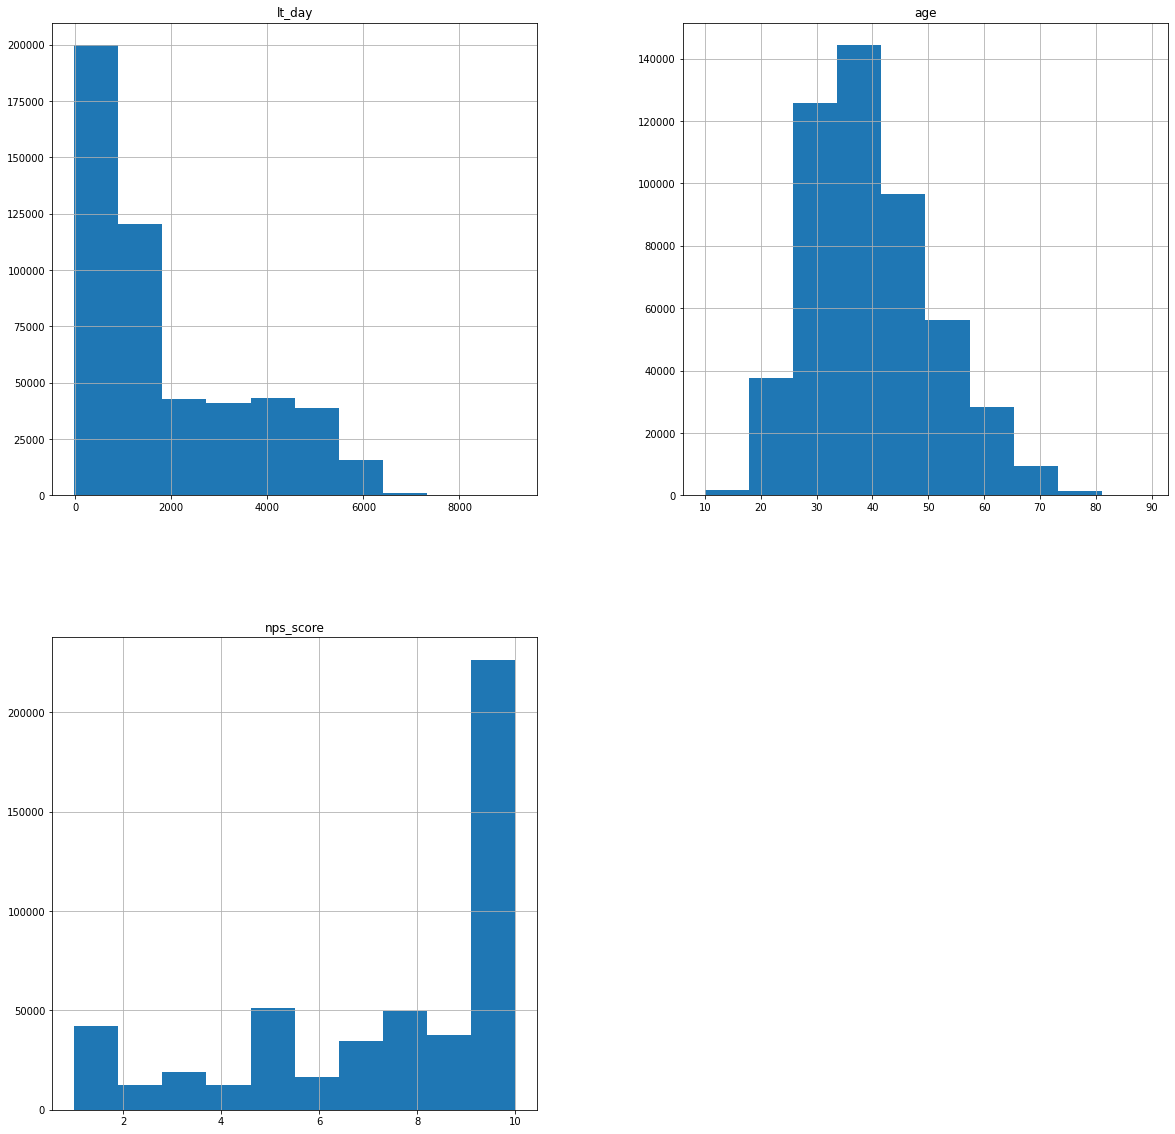

In [14]:
print(df.hist(figsize=(20,20)))
df.describe()

In [15]:
df['lifetime_segment']

0           36+
1           36+
2         13-24
3           36+
4           36+
          ...  
502488      36+
502489      4-6
502490    13-24
502491      36+
502492      36+
Name: lifetime_segment, Length: 502493, dtype: object

### Удаление аномалий в lt day

In [16]:
df['lt_day'] = df[df['lt_day'] > 0]



### Удаление дубликатов

In [17]:
df = df.drop_duplicates()
len(df)

502493

In [18]:
data = df
data = data.rename(columns={"gender":"Gender"})

In [19]:
df.to_csv('telecomm_csi_tableau.csv', index=False)
data[['user_id', 'Gender']].to_csv('telecomm_csi_tableau_gender.csv', index=False)


Общий NPS всех опрошенных

In [22]:
NPS = (len(df[df['nps_segment'] == 'promoters']) - len(df[df['nps_segment'] == 'detractors'])) / len(df)
NPS

0.2189821549752932

### Визуализация в Tableau

https://public.tableau.com/app/profile/alex.prokof/viz/NPSproject_16939514575260/Story1?publish=yes